<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulaci-n-2/blob/main/Fen%C3%B3menos_de_espera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LINEAS DE ESPERA

Los fenómenos de espera, tiene los siguientes elementos en común:
* Llegada al mostrador
* Paso por uno o varios mostradores
* Duración en los que se recibe la atencion con su propio modelo de probabilidad conocido

Existen diferentes escenarios:

## Escenario base


In [22]:
import random
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import seaborn as sns

In [13]:
def LAMBDA(t):
  if 0 <=t<=3:
    return 5+5*t
  elif 3<t<=5:
    return 20
  elif 5<t<=9:
    return 20-2*(t-5)
  else:
    return 0

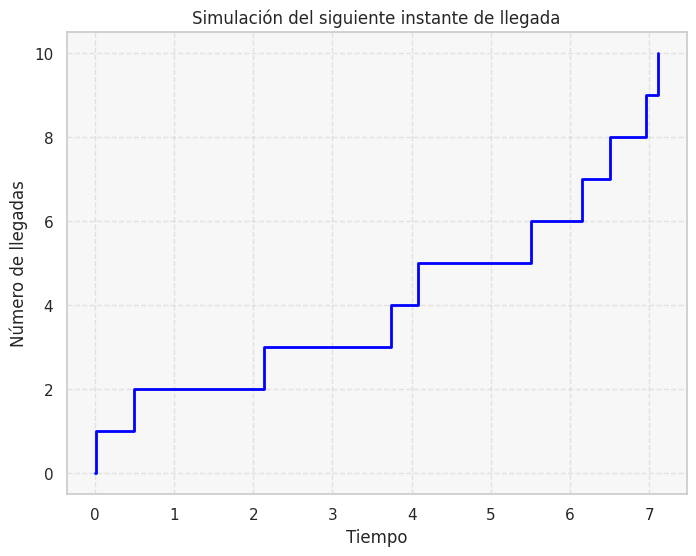

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros iniciales
Lambda = 1.0  # Lambda constante
T = 10        # Tiempo límite de simulación
t = 0         # t = s


# Simulación del siguiente instante de llegada
llegadas = []
tiempos = [t]

while t <= T:
    U1 = rnd.random()
    t = t - np.log(U1) / Lambda
    U2 = rnd.random()

    if U2 <= LAMBDA(t) / Lambda:
        TS = t
        llegadas.append(TS)
        tiempos.append(TS)



fig, ax = plt.subplots(figsize=(8, 6))
ax.step(tiempos, np.arange(len(tiempos)), where='post', color='blue', lw=2)
ax.set_xlabel('Tiempo')
ax.set_ylabel('Número de llegadas')
ax.set_title('Simulación del siguiente instante de llegada')
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_facecolor('#f7f7f7')
plt.show()

## COLA DE UN SERVIDOR

### CONCEPTOS:
* **Cola**: Sucesión de entidades que espearn recibir o realizar un servicio.
* **Sistema LIFO**: (Last In, Last Out) Último que entra primero que sale
* Sistema SIRO: (Service in Random Order) En orden aleatorio
* Sistema SPT,SPTF: (Shortest Processing Time First) Los que van a tardar menos se colocan primero
* Sistema PR: (according to PRiority) Los que tiene algún tipo de preferencial

### SUPUESTOS

* El tiempo de espera $Y$ es una variable aleatoria y simulable
* Existe hora de cierre $T$ que no atiende más clientes depués de la hora de cierre
* El sistema no tiene limitaciones de capacidad

### SIMULACION SSD

Permite realizar la simulación con los supuestos anteriores de manera sistemática:

*Variables*
* $\;\;n\;\;$ : Número de clientes en el sistema en el instante $t$
* $\;\;\;t\;\;\;$ :     Tiempo
* $N_{LL}$ : Número de llegadas hasat el instante $t$
* $N_S\;\;$ : Número de salidas hasta el intante $t$



Tiempo medio: 60.70
Número total de clientes: 23
Número total de servicios: 23


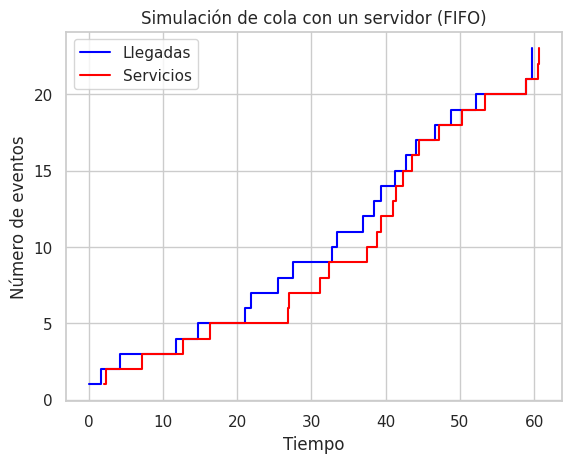

In [66]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Parámetros
t=0
n=0
N_LL=0
N_S=0
T=60
LAMBDA=0.34
MU=0.5
Tp=0

tiempos=[0]
eventos=[0]
LL=[]  #Tiempos de llegada
S=[]   #Tiempos de servicio
t_LL=0  #Tiempo del siguiente evento de llegada
t_s=float('inf')
t_LL=np.mean(tiempos)

while True:
    # CASO 1
    if (t_LL <= t_s) and (t_LL <= T):
        t=t_LL
        N_LL+=1
        n+=1
        LL.append(t)
        t_LL=t-np.log(rnd.random())/LAMBDA  #Tiempo de llegada

        if n==1:
            t_s=t-np.log(rnd.random())/MU

    # CASO 2
    elif (t_LL > t_s) and (t_s <= T):
        t=t_s
        N_S+=1
        n-=1
        S.append(t)

        if n > 0:
            t_s=t-np.log(rnd.random())/MU
        else:
            t_s=float('inf')

    # CASO 3
    elif (t_s > T) and (t_LL > T) and (n > 0):
        t=t_s
        N_S+=1
        n-=1
        S.append(t)

        if n > 0:
            t_s=t-np.log(rnd.random())/MU
        else:
            t_s=float('inf')

    # CASO 4
    elif (t_s > T) and (t_LL > T) and (n == 0):
        Tp = max(0, t - T)
        break

print(f"Tiempo medio: {np.mean(t):.2f}")
print(f"Número total de clientes: {N_LL}")
print(f"Número total de servicios: {N_S}")

# Gráfica de llegadas y servicios
plt.step(LL, np.arange(1, len(LL) + 1), where='post', label='Llegadas', color='blue')
plt.step(S, np.arange(1, len(S) + 1), where='post', label='Servicios', color='red')
plt.xlabel('Tiempo')
plt.ylabel('Número de eventos')
plt.title('Simulación de cola con un servidor (FIFO)')
plt.legend()
plt.grid(True)
plt.show()


## COLA DE DOS SERVIDORES EN SERIE

*Variables*
* $\;\;\;t\;\;\;$ :     Tiempo
* $N_{LL}$ : Número de llegadas hasat el instante $t$
* $N_S\;\;$ : Número de salidas hasta el intante $t$
* $\;\;n_1\;\;$ : Número de clientes en la cola y atendido, en $S_1$ para el instante $t$
* $\;\;n_2\;\;$ : Número de clientes $S_2$ en el instante $t$

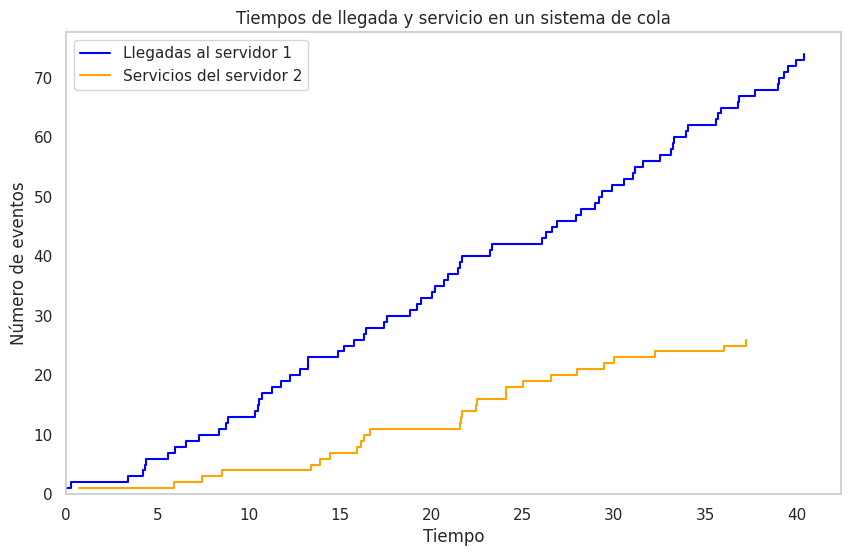

In [83]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Inicialización
t = 0
N_events = 100  # Número de eventos a simular
n1 = 0
n2 = 0
N_LL = 0
N_S = 0
t_LL = 0
t1 = float('inf')
t2 = float('inf')
LAMBDA_1 = 0.34
LAMBDA_2 = 0.4

# Función para generar tiempos de llegada y servicio
def generar_tiempo_llegada():
    return random.expovariate(1.0)  # Tasa de llegada

def generar_tiempo_servicio():
    return random.expovariate(1.0)  # Tasa de servicio

# Generar el primer tiempo de llegada
T0 = -np.log(random.random()) / LAMBDA_1
t_LL = T0

# Listas para almacenar los tiempos de llegada y servicio
LL1 = []
S = []

# Simulación
for _ in range(N_events):
    if t_LL <= t1 and t_LL <= t2:
        # CASO 1
        t = t_LL
        N_LL += 1
        n1 += 1
        LL1.append(t)
        T_t = generar_tiempo_servicio()
        t_LL = t + T_t

        if n1 == 1:
            Y = generar_tiempo_servicio()
            t1 = t + Y

    elif t_LL > t1 and t1 <= t2:
        # CASO 2
        t = t1
        n1 -= 1
        n2 += 1
        LL1.append(t)

        if n1 == 0:
            t1 = float('inf')
        else:
            Y1 = generar_tiempo_servicio()
            t1 += Y1

        if n2 == 1:
            Y2 = generar_tiempo_servicio()
            t2 = t + Y2

    elif t2 < t1 and t2 < t_LL:
        # CASO 3
        t = t2
        N_S += 1
        n2 -= 1
        S.append(t)

        if n2 > 0:
            Y2 = generar_tiempo_servicio()
            t2 = t + Y2
        else:
            t2 = float('inf')

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Gráfica de tiempos de llegada
plt.step(LL1, range(1, len(LL1) + 1), where='post', label='Llegadas al servidor 1', color='blue')

# Gráfica de tiempos de servicio
plt.step(S, range(1, len(S) + 1), where='post', label='Servicios del servidor 2', color='orange')

# Configuraciones de la gráfica
plt.title('Tiempos de llegada y servicio en un sistema de cola')
plt.xlabel('Tiempo')
plt.ylabel('Número de eventos')
plt.legend()
plt.grid()
plt.xlim(left=0)  # Limitar el eje x para que comience desde 0
plt.ylim(bottom=0)  # Limitar el eje y para que comience desde 0
plt.show()
